## Desafío - Clasificación desde Machine Learning
### Cristian Vidal

__Descripción__

En esta sesión trabajaremos con una base de datos sobre __clientes morosos de un banco__. Dentro de
ésta se registran las siguientes observaciones:

* __default__ : Variable binaria. Registra si el cliente entró en morosidad o no.
* __income__ : Ingreso promedio declarado por el cliente.
* __balance__ : Total de saldo en la cuenta de crédito.
* __student__ : Variable binaria. Registra si el cliente es estudiante o no.

### Desafío 1: Preparación del ambiente de trabajo
* Importe los módulos básicos para el análisis de datos
* Importe seaborn .
* Importe statsmodels
* Importe LogisticRegression , train_test_split , StandardScaler ,
* classification_report y roc_curve de sklearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (6,3)

#Regresión clasica
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

#RegresiónLineal Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score,mean_squared_error, r2_score, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
df = pd.read_csv('default_credit.csv')
df = df.drop("index", axis =1)
df.sample(10)

,default,student,balance,income
8664,No,Yes,562.837698,25068.046448
8555,No,No,983.490679,20828.530652
5757,No,No,919.812637,44316.358327
8110,No,Yes,1051.247162,23200.970993
8155,No,No,825.600966,33986.697324
9778,No,No,297.243034,39081.922898
1286,No,No,998.362061,38385.291308
5638,No,Yes,740.228677,23469.387504
7687,No,No,108.003864,44764.288897
3594,No,No,926.309641,38093.977519


In [3]:
df.dtypes

default     object
student     object
balance    float64
income     float64
dtype: object

In [4]:
df['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [5]:
df['student'].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [6]:
df.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

### Desafío 2: Análisis exploratorio

* Explore las principales relaciones entre las variables. Utilizando los métodos __boxplot__ y __lmplot__ de seaborn implemente los siguientes gráficos.

 * Un boxplot del balance total de las cuentas, segmentado por el status de estudiante.

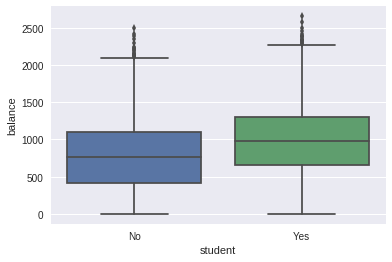

In [7]:
sns.boxplot(x=df['student'], y=df['balance'])

__Podemos observar que los clientes que son estudiantes tienen un mayor saldo en su cuenta de crédito en comparación con los clientes que NO son estudiantes__

* Un boxplot del ingreso total de cada cliente, segmentado por el status de estudiante.

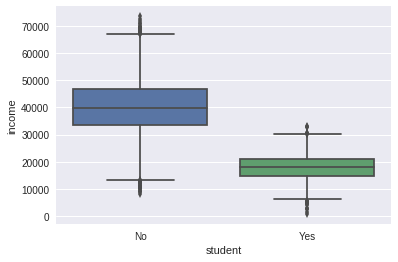

In [8]:
sns.boxplot(x=df['student'], y=df['income'])

__Podemos observar que los clientes que NO son estudiantes tienen ingresos mas altos que los clientes que SON estudiantes.__

* Un boxplot del balance total de las cuentas, segmentado por el status de default

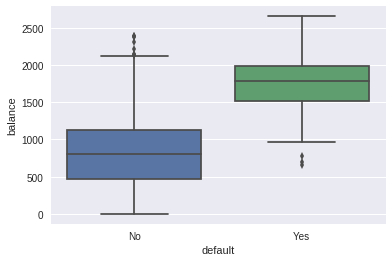

In [9]:
sns.boxplot(x=df['default'], y=df['balance'])

__Podemos observar que los clientes morosos tienen un elevado saldo en sus cuentas de crédito en comparación con los clientes que NO son morosos.__

* Un boxplot del ingreso total de cada cliente, segmentado por el status de default.

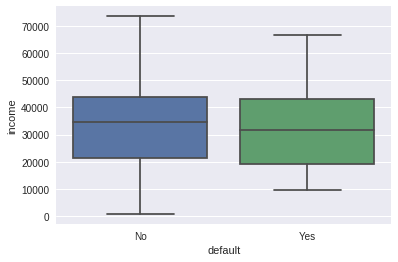

In [10]:
sns.boxplot(x=df['default'], y=df['income'])

__Podemos observar que los clientes morosos y no morosos de acuerdo a su ingresos tienen casi la misma mediana, pero los clientes morosos tienen un poco menos de variabilidad y una leve disminución en su ingreso, las "cajas" son prácticamente iguales, todo indica que no existe una relación entre ambas variables.__

* Un diagrama de dispersión entre balance e income , segmentado por el status de
estudiante.

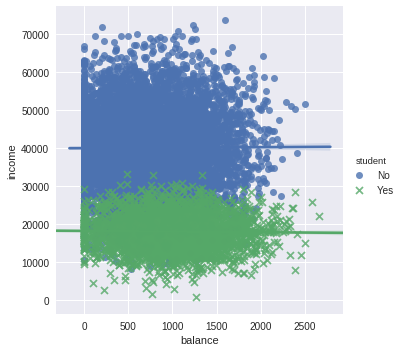

In [11]:
sns.lmplot(x="balance", y="income", hue="student", data=df,  markers=["o", "x"], fit_reg = True)

__A simple vista podemos observar que los clientes que son estudiantes tienen ingresos menores, pero el saldo en su cuenta de crédito son un poco mas elevados que los clientes que no son estudiantes. Tambien podemos visualizar que la mayoria de los clientes no son estudiantes.__

* Un diagrama de dispersión entre balance e income , segmentado por el status de default.

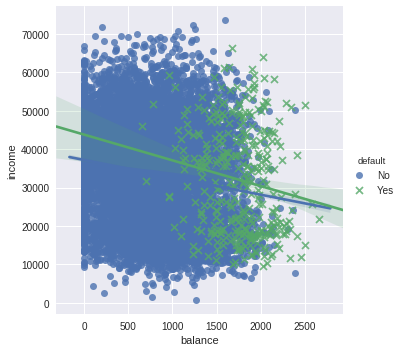

In [12]:
sns.lmplot(x="balance", y="income", hue="default", data=df,  markers=["o", "x"], fit_reg = True)

__Podemos observa que para los clientes morosos parece existir una relacion entre el ingreso y el saldo que tienen en la cuenta de crédito. Los ingresos no tienen relacion si un cliente es o no moroso.__

### Desafío 3: Modelación econométrica

* Recodifique las variables student y default para que adquieran atributos numéricos.

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['default']= encoder.fit_transform(df['default'])
df['student']= encoder.fit_transform(df['student'])
df.sample(5)

,default,student,balance,income
8757,0,1,1486.377300,19164.350400
8325,0,0,890.266646,38376.090647
7949,0,0,172.157592,28370.865909
25,0,0,855.008523,25211.332161
8138,0,0,425.779791,42131.535956


In [14]:
df['default'].value_counts()

0    9667
1     333
Name: default, dtype: int64

In [15]:
df['student'].value_counts()

0    7056
1    2944
Name: student, dtype: int64

* Implemente modelo econométrico

In [16]:
modelo = smf.logit('default ~ balance + income + student', df).fit()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


In [17]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Tue, 07 Jul 2020   Pseudo R-squ.:                  0.4619
Time:                        02:06:52   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                3.257e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance        0.0057      0.000     24.737      0.000       0.005       0.006
income      3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
student       -0.6468      0.236     -2.738      0.006      -1.110      -0.184
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

* A partir de este modelo, depúrelo y mantenga las principales características. Ejecute de nuevo el modelo y comente brevemente sobre el comportamiento de los atributos

In [18]:
modelo_depurado = smf.logit('default ~ balance + student', df).fit()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


In [19]:
modelo_depurado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Tue, 07 Jul 2020   Pseudo R-squ.:                  0.4619
Time:                        02:06:53   Log-Likelihood:                -785.84
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                1.189e-293
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.7495      0.369    -29.115      0.000     -11.473     -10.026
balance        0.0057      0.000     24.748      0.000       0.005       0.006
student       -0.7149      0.148     -4.846      0.000      -1.004      -0.426
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

__Podemos observar que no existe diferencia entre los valores de "Pseudo R-squ.",. La variable "student" mejoró en cuanto a su "coef" pasando a ser la variable mas significativa con un valor de -0.71__.


### Desafío 4: Entrenar

A partir del modelo depurado, genere un modelo predictivo con las siguientes características:

* __Estandarize la matriz de atributos.__

In [20]:
std_matrix = StandardScaler().fit_transform(df.loc[:, 'student':'income'])


* __Genere subconjuntos de entrenamiento y validación, separando el 33% de la muestra en el conjunto de validación__.
* __Implemente el modelo sin alterar los hiperparámetros__.

In [1]:

X_train, X_test, y_train, y_test = train_test_split(std_matrix,
                                                    df['default'],
                                                    test_size=.33,
                                                    random_state=11111)

NameError: name 'train_test_split' is not defined

In [2]:
default_model = LogisticRegression().fit(X_train, y_train)

NameError: name 'LogisticRegression' is not defined

In [23]:
default_model.coef_

array([[-0.38705704,  2.56198458, -0.05122483]])

In [24]:
default_model.intercept_

array([-5.79693016])

* __Genere la predicción de las clases y de la probabilidad__.

In [25]:
modelo_predict = default_model.predict(X_test)
modelo_predict[:20]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

* __Reporte las métricas de precision, recall y f1 para ambas clases.__
* __En base a los pasos, comente sobre el desempeño predictivo del modelo.__

In [26]:
m1_confusion = confusion_matrix(y_test, modelo_predict)
m1_confusion

array([[3174,   12],
       [  78,   36]])

In [27]:
m1_prec = precision_score(y_test, modelo_predict)
print("La proporción de los clientes que realmente son morosos y que el modelo predijo correctamente fue de {}.".format(m1_prec))

La proporción de los clientes que realmente son morosos y que el modelo predijo correctamente fue de 0.75.


In [28]:
m1_rec = recall_score(y_test, modelo_predict)
print("La proporción de los clientes que realmente son morosos y que fue identificado por el algoritmo como si fueran morosos fue de {}".format(round(m1_rec,2)))

La proporción de los clientes que realmente son morosos y que fue identificado por el algoritmo como si fueran morosos fue de 0.32


In [29]:
print(classification_report(y_test, modelo_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3186
           1       0.75      0.32      0.44       114

   micro avg       0.97      0.97      0.97      3300
   macro avg       0.86      0.66      0.72      3300
weighted avg       0.97      0.97      0.97      3300



El puntaje de precisión es aceptable pero el puntaje para recall es muy bajo __(y=1)__. Un punto a destacar es la alta tasa de recall que tiene con los valores etiquetados como __y=0__.
Resulta que nuestro modelo tiene problemas para clasificar correctamente los casos donde los clientes son morosos sus métricas presentan tasas bajas cercanas al __44%__, pero no tenemos problemas para clasificar los casos donde los clientes no son morosos sus métricas presentan tasas casi del __100%__.

* __Grafique la curva Receiver Operator Characteristic.__

Text(0.5, 0, 'Falsos Positivos')

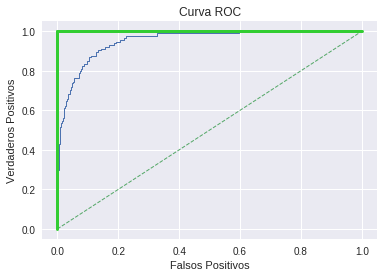

In [30]:
# reestimamos los valores predichos de nuestro modelo para obtener la probabilidad entre 0 y 1.
modelo_predict_final = default_model.predict_proba(X_test)[:, 1]

# generamos los objetos de roc_cruve
false_positive, true_positive, threshold = roc_curve(y_test, modelo_predict_final)

# generamos los objetos de roc_cruve
false_positive, true_positive, threshold = roc_curve(y_test, modelo_predict_final)

# Plot ROC curve
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] , c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos')

In [31]:
print(round(metrics.roc_auc_score(y_test, modelo_predict_final),2))

0.95


A primera vista podemos observar que nuestro modelo tiene una curva por sobre la bisectriz. Con un valor de __.95__, nuestro modelo tiene un desempeño de __45%__ superior a un mecanismo de clasificación aleatoria.